# Análise Exploratória e Tratamento de Dados

In [1]:
# importar as bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
# Carregar o arquivo CSV
df = pd.read_csv("jogadores.csv")

In [3]:
# Exibir as primeiras linhas do dataframe
df.head()

,id,score,nivel,categoria,idade,pais
0,1,321057.0,321.0,elfo,43.0,United States
1,2,495527.0,466.0,mago,16.0,Canada
2,3,700848.0,255.0,NaN,54.0,United States
3,4,985558.0,679.0,mago,87.0,Brazil
4,5,517633.0,752.0,guerreiro,69.0,Japan


In [4]:
# Exibir as ultimas linhas do dataframe
df.tail()

,id,score,nivel,categoria,idade,pais
995,996,146132.0,417.0,elfo,78.0,Japan
996,997,845482.0,588.0,orc,69.0,Portugal
997,998,230131.0,660.0,mago,57.0,Japan
998,999,635044.0,731.0,orc,17.0,Brazil
999,1000,317887.0,477.0,orc,64.0,Brazil


In [5]:
# formato do dataframe para exibir o numero de linhas e colunas
df.shape

(1000, 6)

## Análise Exploratória
* Dados numéricos: score, nivel e idade
* Dados categóricos: categoria e pais
* Verificar valores nulos/NaN

In [137]:
# verificação de campos nulos no dataframe
df.isnull().sum()

id           0
score        2
nivel        2
categoria    3
idade        3
pais         2
dtype: int64

### Colunas Categóricas
* Contar e agrupar os registros por categoria
* Visualizar a distribuição usando gráficos de barras

#### Categoria

In [6]:
# agrupando e contando os dados da coluna categoria
df.groupby(['categoria']).size()

categoria
elfo         238
guerreiro    242
m@go           1
mago         275
orc          241
dtype: int64

<Axes: xlabel='categoria'>

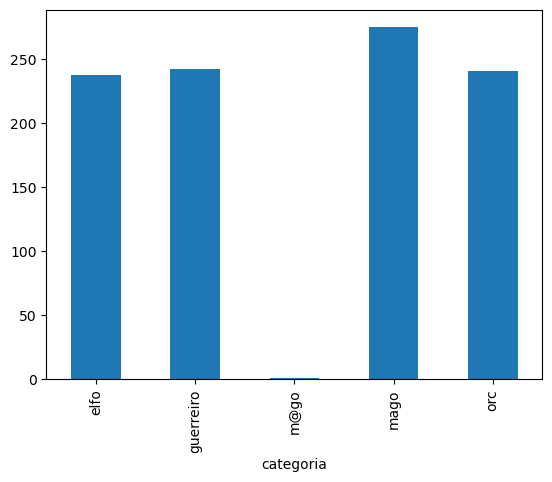

In [7]:
# gráfico de barras
df.groupby(['categoria']).size().plot.bar()

Esse gráfico mostra quantos personagens existem em cada categoria, como "mago", "guerreiro", etc.
Além de ajudar a visualizar a frequência de cada classe, ele também revelou um erro de digitação: "m@go", que aparece separadamente das demais e claramente deveria ser "mago".
Esses erros são fáceis de identificar visualmente quando uma barra destoante aparece isolada.

#### País

In [8]:
# agrupando e contando os dados da coluna pais
df.groupby(['pais']).size()

pais
%apan               1
Australia           7
Brazil            279
C#nada              1
Canada             93
Italy              10
Japan             130
Mexico             74
Portuga&            1
Portugal          222
Spain              14
United Kingdom     16
United States     150
dtype: int64

<Axes: xlabel='pais'>

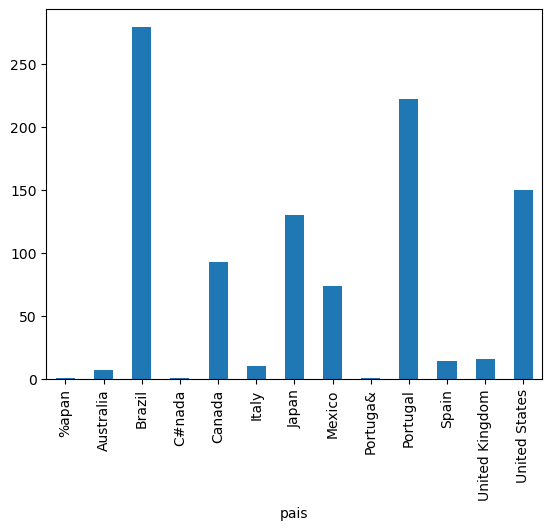

In [10]:
# gráfico de barras
df.groupby(['pais']).size().plot.bar()

Aqui vemos a distribuição de países registrados.
Esse gráfico também nos ajudou a identificar três entradas incorretas: "%apan", "C#nada" e "Portuga&", que provavelmente foram causadas por erros de digitação e deveriam ser "Japan", "Canada" e "Portugal".
Visualmente, essas entradas aparecem como países distintos e com contagens pequenas, o que chamou atenção para o problema.

### Colunas Numéricas
* Gerar resumo estatístico
* Observar a distribuição dos dados com boxplot e histograma

In [145]:
# análise geral
df.describe()

,id,score,nivel,idade
count,1000.000000,998.000000,998.000000,997.000000
mean,500.500000,496350.856713,495.098196,56.822467
std,288.819436,283458.860428,288.395089,25.249907
min,1.000000,-464.000000,-516.000000,12.000000
25%,250.750000,259577.250000,247.750000,35.000000
50%,500.500000,497023.500000,493.500000,59.000000
75%,750.250000,745172.500000,742.000000,78.000000
max,1000.000000,998871.000000,1000.000000,133.000000


#### Score

Text(0.5, 1.0, 'Score')

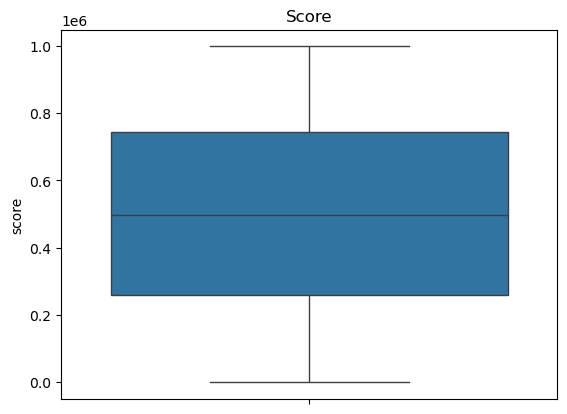

In [13]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['score']).set_title('Score')

O boxplot da coluna score serve pra mostrar possíveis valores muito fora do comum.
Apesar de a coluna ter valores inválidos (como negativos e acima de 1 milhão), o gráfico não chega a destacar outliers visíveis — provavelmente porque estão diluídos pela escala.
Ainda assim, o describe() mostra que esses valores existem.

Text(0.5, 1.0, 'Score')

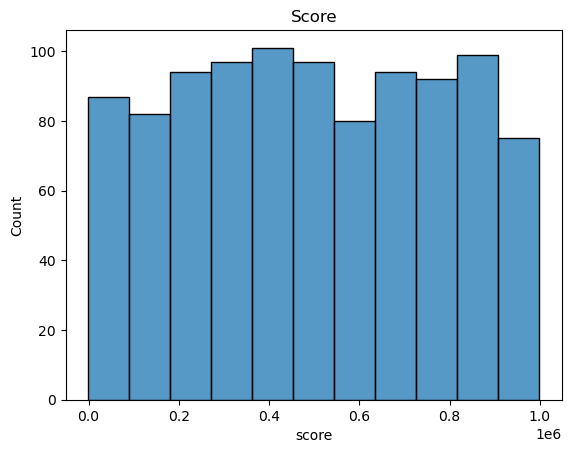

In [14]:
# histograma: distribuição das frequencias
srn.histplot(df['score']).set_title('Score')

Esse gráfico mostra como as pontuações estão distribuídas.
Dá pra perceber que a maioria dos jogadores está concentrada na faixa intermediária, com poucos em pontuações muito baixas ou muito altas.

#### Nível

Text(0.5, 1.0, 'Nivel')

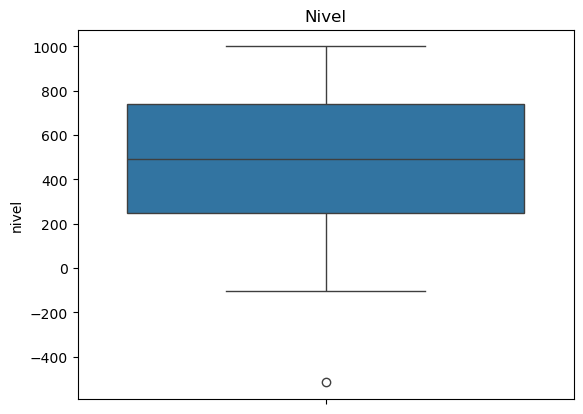

In [15]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['nivel']).set_title('Nivel')

Aqui conseguimos ver claramente a presença de outliers.
Existe pelo menos um valor abaixo do mínimo esperado (níveis negativos), o que não faz sentido pra esse tipo de dado.
O boxplot destaca esses valores como pontos fora da faixa normal.

Text(0.5, 1.0, 'Nivel')

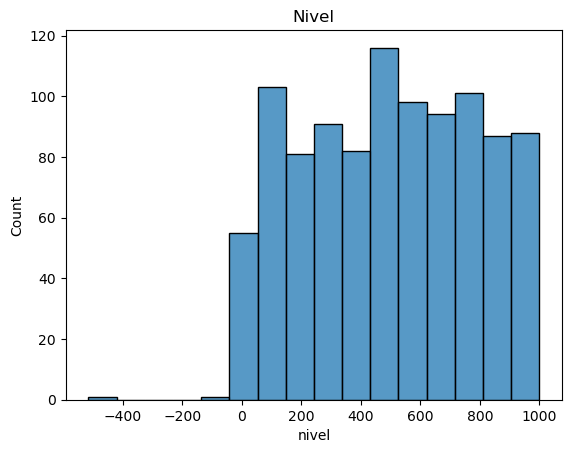

In [16]:
# histograma: distribuição das frequencias
srn.histplot(df['nivel']).set_title('Nivel')

Mostra a frequência de cada faixa de nível.
A distribuição parece relativamente espalhada, com bastante gente entre os níveis intermediários.
Mas o gráfico também deixa claro que há níveis negativos, o que reforça o erro detectado no boxplot.

#### Idade

Text(0.5, 1.0, 'Idade')

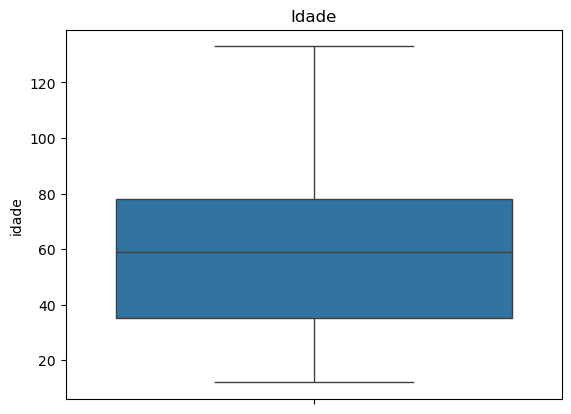

In [17]:
# boxplot: verificar outliers (valores fora do conjunto)
srn.boxplot(df['idade']).set_title('Idade')

O boxplot da idade não mostra outliers visíveis, apesar de o describe() indicar valores acima de 100 anos.
Isso pode acontecer porque os valores extremos ainda estão dentro do limite visual do gráfico, ou por serem poucos casos.

Text(0.5, 1.0, 'Idade')

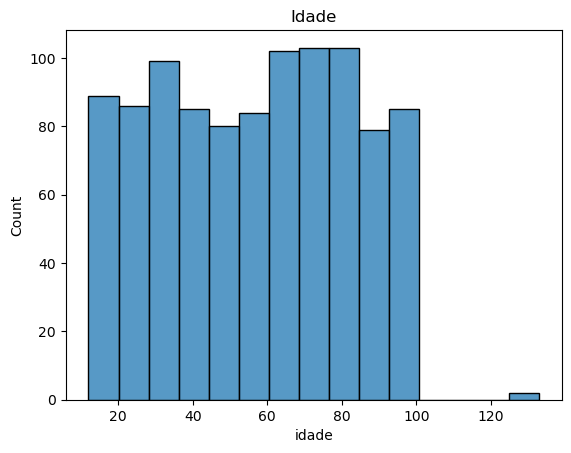

In [18]:
# histograma: distribuição das frequencias
srn.histplot(df['idade']).set_title('Idade')

Aqui vemos como as idades estão distribuídas.
A maior parte dos jogadores está entre 30 e 80 anos, com concentração perto dos 60.
Valores acima de 100 são poucos e não se destacam muito visualmente.

### Detecção de valores faltantes

Aqui verificamos se existem valores ausentes no conjunto de dados.  
Isso ajuda a decidir o que deve ser ajustado antes de partir para análises mais profundas.

In [19]:
df.isnull().sum()

id           0
score        2
nivel        2
categoria    3
idade        3
pais         2
dtype: int64

## Limpeza e Ajuste dos Dados
* Dados numéricos: valores ausentes e inválidos foram substituídos pela mediana
* Dados categóricos: valores ausentes foram substituídos pela categoria mais comum

### Categoria
Os valores nulos da coluna `categoria` foram preenchidos com o valor mais comum (mago),  
e também corrigimos o valor com erro de digitação ('m@go') para 'mago'.

In [155]:
# preenchendo os valores nulos com a moda
df.fillna({'categoria': 'mago'}, inplace = True)

# verificar se ainda existem nulos
df['categoria'].isnull().sum()

0

In [156]:
# Corrigindo erro de digitação: substituindo 'm@go' por 'mago'
df.loc[df['categoria'] == 'm@go', 'categoria'] = 'mago'

# Verificando novamente a contagem de categorias após a correção
df.groupby(['categoria']).size()

categoria
elfo         238
guerreiro    242
mago         279
orc          241
dtype: int64

### País
Preenchemos os valores ausentes com a categoria mais frequente ('Brazil') e corrigimos entradas com erros como '%apan', que foi alterado para 'Japan'.

In [157]:
# preenchendo os valores nulos com a moda
df.fillna({'pais': 'Brazil'}, inplace = True)

# verificar se ainda existem nulos
df['pais'].isnull().sum()

0

In [158]:
# Corrigindo os erros de digitação na coluna 'pais'
df['pais'] = df['pais'].replace({
    '%apan': 'Japan',
    'C#nada': 'Canada',
    'Portuga&': 'Portugal'
})

# Verificando novamente a contagem de paises após a correção
df.groupby(['pais']).size()

pais
Australia           7
Brazil            281
Canada             94
Italy              10
Japan             131
Mexico             74
Portugal          223
Spain              14
United Kingdom     16
United States     150
dtype: int64

### Score

Foi usada a mediana da pontuação para preencher dados nulos e também para substituir valores inválidos (como negativos ou acima de 1.000.000), conforme as regras da base.

In [22]:
#calcular a mediana da pontuação
medianaScore = sts.median(df["score"])

medianaScore

456111.5

In [23]:
#relembrando o resumo estatístico
df['score'].describe()

count       998.000000
mean     496350.856713
std      283458.860428
min        -464.000000
25%      259577.250000
50%      497023.500000
75%      745172.500000
max      998871.000000
Name: score, dtype: float64

In [24]:
# preencher os valores nulos com a mediana
df.fillna({'score' : medianaScore }, inplace=True)

# verificar se ainda existem nulos
df['score'].isnull().sum()

0

In [25]:
# Substituindo os valores inválidos de score pela mediana
df.loc[(df["score"] < 0) | (df["score"] > 1000000), "score"] = medianaScore

# Verificando os dados da coluna score após o tratamento
df['score'].describe()

count      1000.000000
mean     496726.953500
std      282746.734129
min         884.000000
25%      260677.500000
50%      495862.000000
75%      744387.500000
max      998871.000000
Name: score, dtype: float64

#### Nível

Aplicamos o mesmo procedimento: valores ausentes foram substituídos pela mediana,  
e também ajustamos valores fora do intervalo permitido (0 a 1000).

In [26]:
#calcular a mediana do nivel
medianaNivel = sts.median(df["nivel"])

medianaNivel

14.0

In [27]:
#relembrando o resumo estatístico
df['nivel'].describe()

count     998.000000
mean      495.098196
std       288.395089
min      -516.000000
25%       247.750000
50%       493.500000
75%       742.000000
max      1000.000000
Name: nivel, dtype: float64

In [28]:
# preencher os valores nulos com a mediana
df.fillna({'nivel' : medianaNivel }, inplace=True)

# verificar se ainda existem nulos
df['nivel'].isnull().sum()

0

In [29]:
# Substituindo os valores inválidos de nivel pela mediana
df.loc[(df["nivel"] < 0) | (df["nivel"] > 1000), "nivel"] = medianaNivel

# Verificando os dados da nivel score após o tratamento
df['nivel'].describe()

count    1000.000000
mean      494.783000
std       287.315931
min         1.000000
25%       246.750000
50%       492.500000
75%       742.000000
max      1000.000000
Name: nivel, dtype: float64

#### Idade
A coluna `idade` teve os nulos substituídos pela mediana,  
e valores acima de 100 foram considerados inválidos e corrigidos da mesma forma.

In [30]:
#calcular a mediana da idade
medianaIdade = sts.median(df["idade"])

medianaIdade

43.0

In [168]:
#relembrando o resumo estatístico
df['idade'].describe()

count    997.000000
mean      56.822467
std       25.249907
min       12.000000
25%       35.000000
50%       59.000000
75%       78.000000
max      133.000000
Name: idade, dtype: float64

In [32]:
# preencher os valores nulos com a mediana
df.fillna({'idade' : medianaIdade }, inplace=True)

# verificar se ainda existem nulos
df['idade'].isnull().sum()

0

In [33]:
# Substituindo os valores inválidos de idade pela mediana
df.loc[(df["idade"] < 0) | (df["idade"] > 100), "idade"] = medianaIdade

# Verificando os dados da idade score após o tratamento
df['idade'].describe()

count    1000.000000
mean       56.609000
std        25.021835
min        12.000000
25%        35.000000
50%        58.000000
75%        78.000000
max       100.000000
Name: idade, dtype: float64